Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix

# **Data Importing**

In [2]:
df=pd.read_csv('vgsales.csv')
df.head(6)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


# **Data Exploratory**

In [3]:
df.shape

(16598, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
for column in df:
    print(df[column].value_counts())
    print(' ')

Rank
1        1
11089    1
11059    1
11060    1
11061    1
        ..
5539     1
5540     1
5541     1
5542     1
16600    1
Name: count, Length: 16598, dtype: int64
 
Name
Need for Speed: Most Wanted                12
Ratatouille                                 9
FIFA 14                                     9
LEGO Marvel Super Heroes                    9
Madden NFL 07                               9
                                           ..
Ar tonelico Qoga: Knell of Ar Ciel          1
Galaga: Destination Earth                   1
Nintendo Presents: Crossword Collection     1
TrackMania: Build to Race                   1
Know How 2                                  1
Name: count, Length: 11493, dtype: int64
 
Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES     

## Handle missing values

In [6]:
df.isna().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [7]:
df = df.dropna()

In [8]:
df.isna().sum()

,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [9]:
numerical_data=df.select_dtypes(include=[np.number])
categorical_data=df.select_dtypes(exclude=[np.number])

In [10]:
print(f"Numerical data: \n{numerical_data.value_counts()}")
print('------------------------------------------------------------------')
print(f"Categorical data: \n{categorical_data.value_counts()}")

Numerical data: 
Rank   Year    NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
1      2006.0  41.49     29.02     3.77      8.46         82.74           1
11062  2007.0  0.08      0.00      0.00      0.01         0.09            1
11049  1995.0  0.03      0.01      0.05      0.00         0.09            1
11050  1998.0  0.07      0.02      0.00      0.00         0.09            1
11051  1998.0  0.07      0.02      0.00      0.00         0.09            1
                                                                         ..
5522   2005.0  0.25      0.07      0.00      0.01         0.33            1
5523   2006.0  0.22      0.01      0.08      0.02         0.33            1
5524   2007.0  0.11      0.14      0.00      0.08         0.33            1
5525   2013.0  0.01      0.28      0.00      0.03         0.33            1
16600  2003.0  0.01      0.00      0.00      0.00         0.01            1
Name: count, Length: 16291, dtype: int64
-----------------------------------

## EDA

<ipython-input-11-7c431780b1f9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Platform', y='Global_Sales', data=df,palette='viridis')


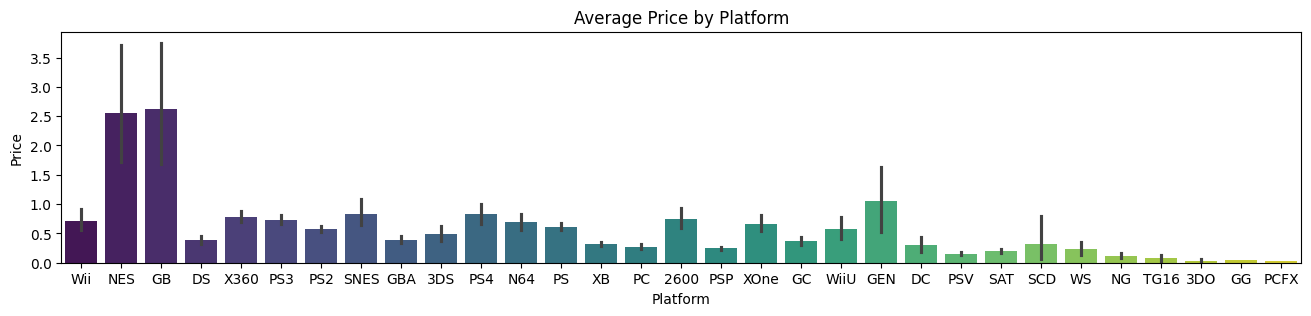

In [11]:
plt.figure(figsize=(16,3))
# Create the bar plot
sns.barplot(x='Platform', y='Global_Sales', data=df,palette='viridis')

# Set the title and labels
plt.title('Average Price by Platform')
plt.xlabel('Platform')
plt.ylabel('Price')

# Show the plot
plt.show()

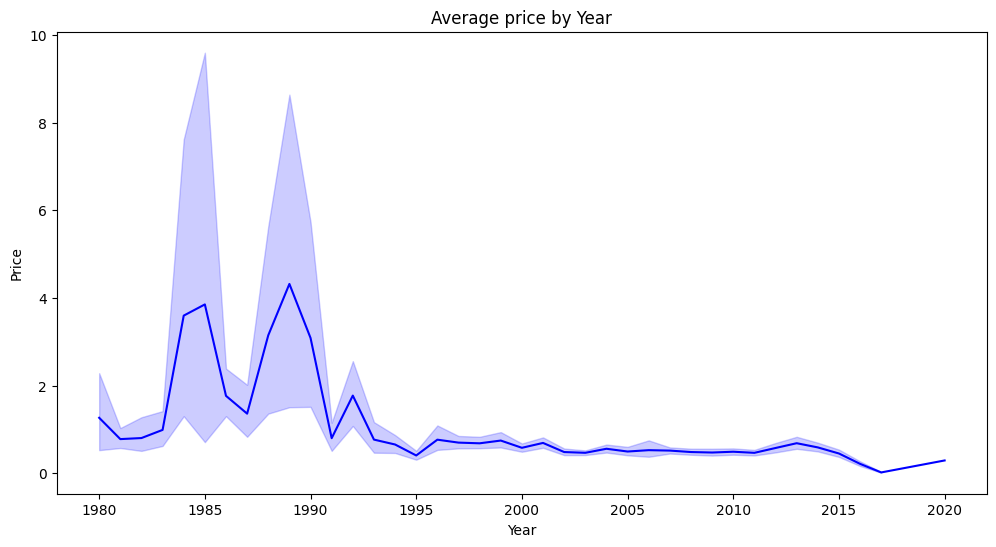

In [38]:
plt.figure(figsize=(12, 6))  # Increase width to 12
sns.lineplot(x='Year', y='Global_Sales', data=df, color='blue')  # Change the color to 'orange'

plt.title('Average price by Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

## Multicollinearity

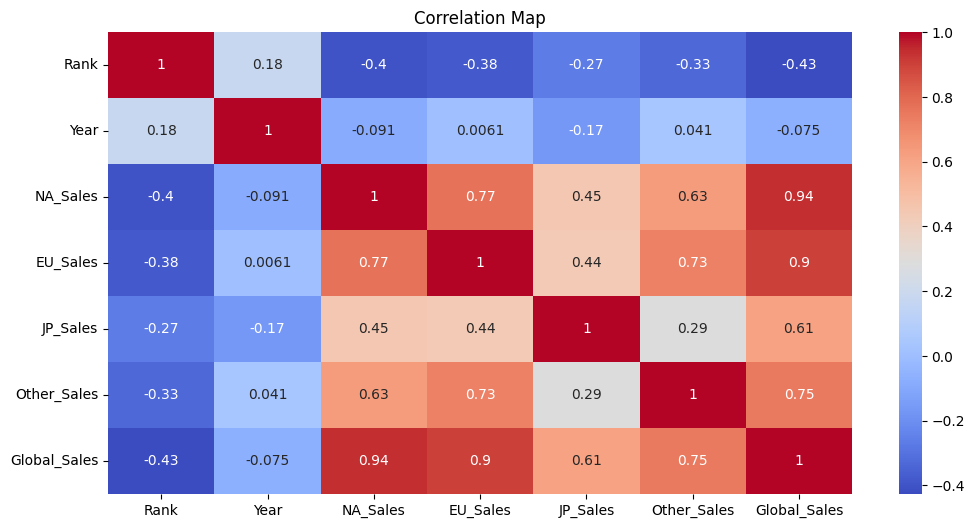

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(data=numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Map')
plt.show()

In [14]:
# df.drop(['NA_Sales', 'EU_Sales'], axis=1, inplace=True)

## drop columns

# **Data Cleaning**

In [15]:
df.drop(['Rank', 'Name'], axis=1, inplace=True)

## encoding

In [16]:
le=LabelEncoder()

In [17]:
df["Publisher"] = le.fit_transform(df["Publisher"])
df["Genre"] = le.fit_transform(df["Genre"])
df["Platform"] = le.fit_transform(df["Platform"])
# df["Name"] = le.fit_transform(df["Name"])

In [18]:
df

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,26,2006.0,10,359,41.49,29.02,3.77,8.46,82.74
1,11,1985.0,4,359,29.08,3.58,6.81,0.77,40.24
2,26,2008.0,6,359,15.85,12.88,3.79,3.31,35.82
3,26,2009.0,10,359,15.75,11.01,3.28,2.96,33.00
4,5,1996.0,7,359,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...
16593,6,2002.0,4,269,0.01,0.00,0.00,0.00,0.01
16594,7,2003.0,8,241,0.01,0.00,0.00,0.00,0.01
16595,16,2008.0,6,21,0.00,0.00,0.00,0.00,0.01
16596,4,2010.0,5,8,0.00,0.01,0.00,0.00,0.01


## drop duplicates

In [19]:
df.duplicated().sum()

252

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.duplicated().sum()

0

# **Data Transformation**

## data scaling

In [22]:
df1 = df.copy()
df2 = df.copy()

In [23]:
#Spliting on df1
X = df1.drop(['Global_Sales'], axis = 1)
y = df1['Global_Sales']
X_train_C1, X_test_C1, y_train_C1, y_test_C1 = train_test_split(X, y, train_size = 0.7, random_state = 42)


In [24]:
y.describe()

,Global_Sales
count,16039.000000
mean,0.548595
std,1.578372
min,0.010000
25%,0.060000
50%,0.180000
75%,0.490000
max,82.740000


In [25]:
# Standard Scaler on df1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_C1 = scaler.fit_transform(X_train_C1)
X_test_C1 = scaler.transform(X_test_C1)

In [26]:
#Spliting on df2
X = df2.drop(['Global_Sales'], axis = 1)
y = df2['Global_Sales']
X_train_C2, X_test_C2, y_train_C2, y_test_C2 = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [27]:
# Normalization Scaling on copy2
min_max = MinMaxScaler()
X_train_C2 = min_max.fit_transform(X_train_C2)
X_test_C2 = min_max.transform(X_test_C2)


# **Modeling**

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

On copy1

In [29]:
model=Sequential()
model.add(Dense(9,activation='relu',kernel_initializer='he_normal',kernel_regularizer='l2'))

model.add(Dense(100,activation='relu'))

model.add(Dense(100,activation='relu'))

model.add(Dense(100,activation='relu'))

model.add(Dense(100,activation='relu'))

model.add(Dense(100,activation='relu'))

model.add(Dense(100,activation='relu'))

model.add(Dense(100,activation='relu'))

model.add(Dense(1,activation='relu'))


In [30]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])

Epoch 1/90
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 1.9510 - mse: 1.7755 - val_loss: 0.4217 - val_mse: 0.2526
Epoch 2/90
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.3715 - mse: 0.2040 - val_loss: 0.3376 - val_mse: 0.1745
Epoch 3/90
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2825 - mse: 0.1209 - val_loss: 0.5698 - val_mse: 0.4124
Epoch 4/90
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2956 - mse: 0.1397 - val_loss: 0.2274 - val_mse: 0.0758
Epoch 5/90
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.2090 - mse: 0.0588 - val_loss: 0.1938 - val_mse: 0.0479
Epoch 6/90
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1856 - mse: 0.0412 - val_loss: 0.1787 - val_mse: 0.0386
Epoch 7/90
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1731 - mse: 0.0344 - val_loss: 0.1675 - val_mse: 0.0331
Epoch 8/90
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1639 - mse: 0.0310 - val_loss: 0.1559 - val_mse: 0.0271
Epoch 9/90
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.15

<Axes: >

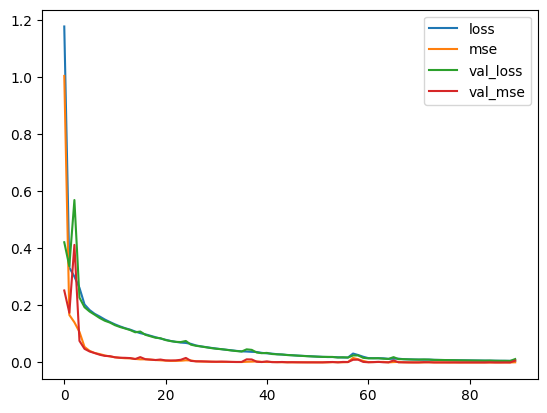

In [31]:
history=model.fit(x=X_train_C1,y= y_train_C1,epochs=90,batch_size=450,validation_data=(X_test_C1,y_test_C1)) # Assuming 'model' and training data are already defined
Results=pd.DataFrame(history.history) # Assign Results after the training is complete

Results.plot()

In [32]:
from sklearn.metrics import r2_score

y_pred_C1_train = model.predict(X_train_C1)
y_pred_C1_test = model.predict(X_test_C1)

r2_train = r2_score(y_train_C1, y_pred_C1_train)
r2_test = r2_score(y_test_C1, y_pred_C1_test)

print("R-squared on train:", r2_train)
print("------------------------------------------------------")
print("R-squared on test:", r2_test)


351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
R-squared on train: 0.9976212308039646
------------------------------------------------------
R-squared on test: 0.9979835589730423


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 9)                   │              81 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │           1,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,348 (724.02 KB)

 Trainable params: 61,782 (241.34 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 123,566 (482.68 KB)

In [34]:
model.layers

[<Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>,
 <Dense name=dense_6, built=True>,
 <Dense name=dense_7, built=True>,
 <Dense name=dense_8, built=True>]

<Axes: >

<Figure size 1200x600 with 0 Axes>

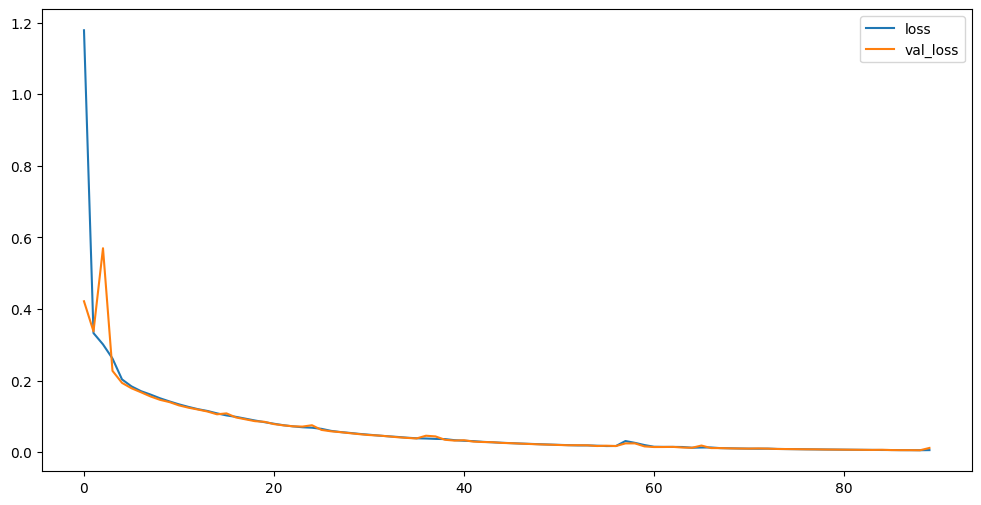

In [35]:
plt.figure(figsize=(12,6))
Results[['loss','val_loss']].plot(figsize=(12,6))

<Axes: >

<Figure size 1200x600 with 0 Axes>

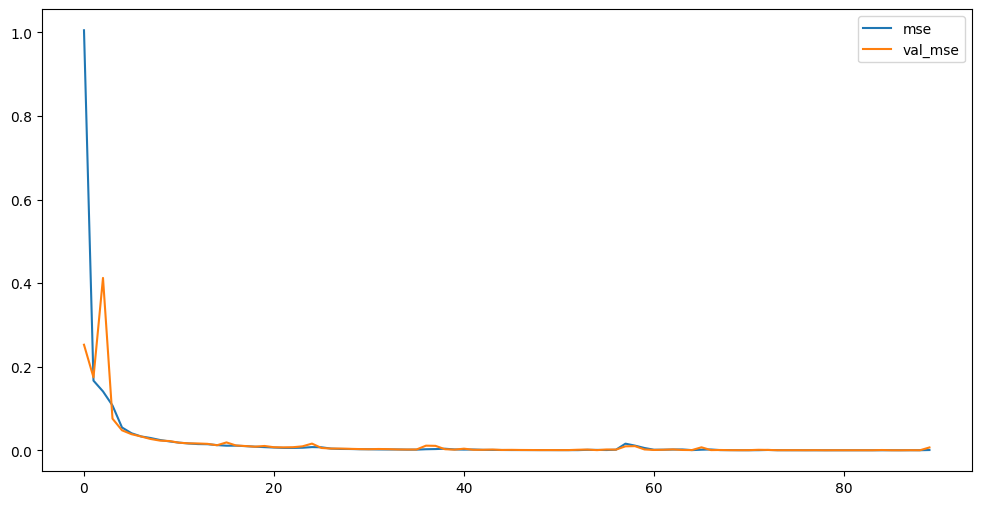

In [36]:
plt.figure(figsize=(12,6))
Results[['mse','val_mse']].plot(figsize=(12,6))

In [37]:
model.evaluate(x=X_test_C1,y=y_test_C1)

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0120 - mse: 0.0068


[0.012056686915457249, 0.006797400303184986]